In [1]:
import os
import csv
import pickle
from glob import glob
import pandas as pd
import numpy as np
from nlp import load_dataset

In [2]:
dataset = load_dataset('csv', delimiter='\t',
                       data_files={'train': 'data/EmoEvalEs/train.tsv',
                                    'validation': 'data/EmoEvalEs/dev.tsv',})
test = load_dataset('csv', delimiter='\t', data_files={'test': 'data/EmoEvalEs/emoevales_test.tsv'})
test = pd.read_csv('data/EmoEvalEs/emoevales_test.tsv', sep='\t', quoting=csv.QUOTE_NONE)
test_gold = pd.read_csv('data/EmoEvalEs/test_gold.tsv', sep='\t', quoting=csv.QUOTE_NONE, names=['id', 'emotion'])

Using custom data configuration default
Using custom data configuration default


In [10]:
binary_test = pd.read_csv('binary-test.csv')
probs_cols = ['probs_sadness','probs_joy','probs_anger', 'probs_surprise', 'probs_disgust', 'probs_fear', 'probs_others']
binary_test['emotion_probs'] = binary_test[probs_cols].idxmax(axis=1)
binary_test['emotion_probs'] = binary_test['emotion_probs'].apply(lambda x: x.split('_')[1])

In [20]:
binary_dev = pd.read_csv('binary2.csv')
probs_cols = ['probs_sadness','probs_joy','probs_anger', 'probs_surprise', 'probs_disgust', 'probs_fear', 'probs_others']
binary_dev['emotion_probs'] = binary_dev[probs_cols].idxmax(axis=1)
binary_dev['emotion_probs'] = binary_dev['emotion_probs'].apply(lambda x: x.split('_')[1])

In [24]:
print(classification_report(binary_dev['emotion_y'], binary_dev['emotion_x'], digits=4))

              precision    recall  f1-score   support

       anger     0.6988    0.6824    0.6905        85
     disgust     0.0000    0.0000    0.0000        16
        fear     1.0000    0.4444    0.6154         9
         joy     0.7041    0.6575    0.6800       181
      others     0.7307    0.8454    0.7839       414
     sadness     0.7981    0.7981    0.7981       104
    surprise     0.6000    0.0857    0.1500        35

    accuracy                         0.7310       844
   macro avg     0.6474    0.5019    0.5311       844
weighted avg     0.7137    0.7310    0.7110       844



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

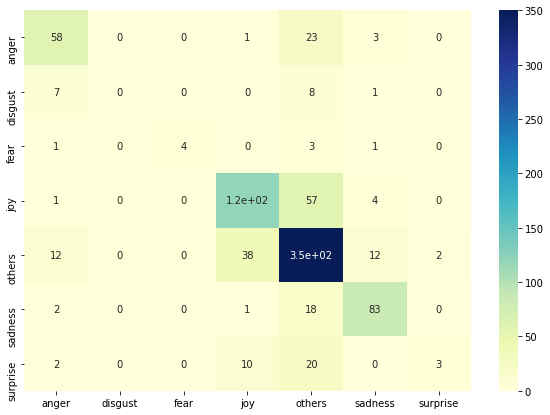

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
c = confusion_matrix(binary_dev['emotion_y'], binary_dev['emotion_x'])
plt.figure(figsize = (10,7))
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'others', 'sadness', 'surprise']
sn.heatmap(c, annot=True, cmap="YlGnBu", xticklabels=emotion_labels, yticklabels=emotion_labels)

In [17]:
def read_preds(name, fold):
    path = 'preds_{}/{}.pck'.format(fold, name)
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

preds = {}

preds['xlmroberta']= pd.read_csv('preds_test/submission-roberta-final.tsv',
                                         header=None, sep='\t', names=['id', 'emotion'])\
    .set_index('id').loc[test['id']]['emotion'].values

preds['binary-xlm'] = binary_test.set_index('id').loc[test['id']]['emotion_probs'].values

preds['extrafeats']= pd.read_csv('submission-extra.tsv',
                                         header=None, sep='\t', names=['id', 'emotion'])\
    .set_index('id').loc[test['id']]['emotion'].values


for preds_test in glob('preds_test/*.pck'):
    name = os.path.splitext(os.path.basename(preds_test))[0]
    if name in ('xlmroberta', 'xlmroberta-extrafeatures', 'xlmroberta-sinpreproc'):
        continue
    preds[name] = read_preds(name, 'test')
print('test', list(preds.keys()))

test ['xlmroberta', 'binary-xlm', 'extrafeats', 'tfidf', 'ngram', 'simon', 'ngramfeats', 'w2v']


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


xlmroberta
              precision    recall  f1-score   support

       anger       0.63      0.66      0.64       168
     disgust       0.00      0.00      0.00        33
        fear       0.71      0.48      0.57        21
         joy       0.68      0.70      0.69       354
      others       0.77      0.81      0.79       814
     sadness       0.78      0.78      0.78       199
    surprise       0.50      0.31      0.39        67

    accuracy                           0.73      1656
   macro avg       0.58      0.54      0.55      1656
weighted avg       0.71      0.73      0.72      1656



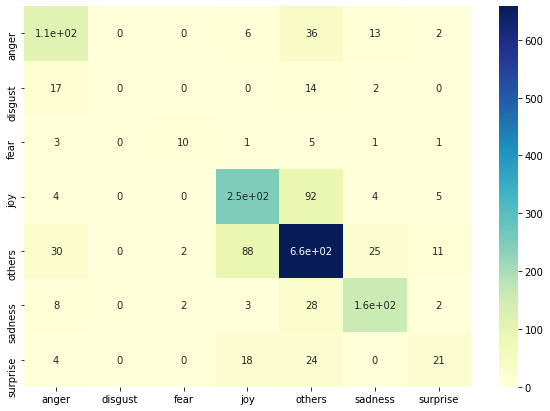


binary-xlm
              precision    recall  f1-score   support

       anger       0.66      0.53      0.59       168
     disgust       0.00      0.00      0.00        33
        fear       0.69      0.43      0.53        21
         joy       0.70      0.60      0.65       354
      others       0.72      0.88      0.79       814
     sadness       0.75      0.78      0.77       199
    surprise       0.57      0.06      0.11        67

    accuracy                           0.71      1656
   macro avg       0.59      0.47      0.49      1656
weighted avg       0.69      0.71      0.69      1656



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


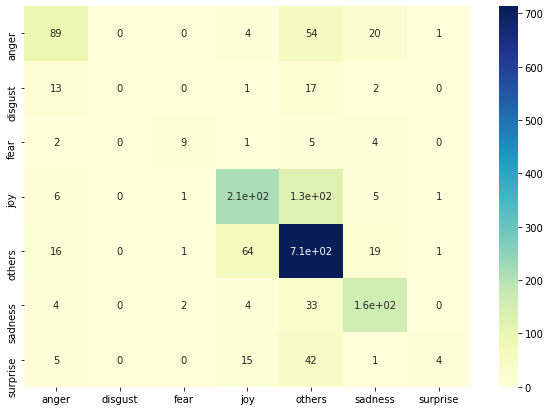


extrafeats
              precision    recall  f1-score   support

       anger       0.66      0.56      0.60       168
     disgust       0.00      0.00      0.00        33
        fear       1.00      0.05      0.09        21
         joy       0.68      0.69      0.69       354
      others       0.74      0.83      0.78       814
     sadness       0.72      0.80      0.76       199
    surprise       0.60      0.18      0.28        67

    accuracy                           0.72      1656
   macro avg       0.63      0.44      0.46      1656
weighted avg       0.70      0.72      0.70      1656



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


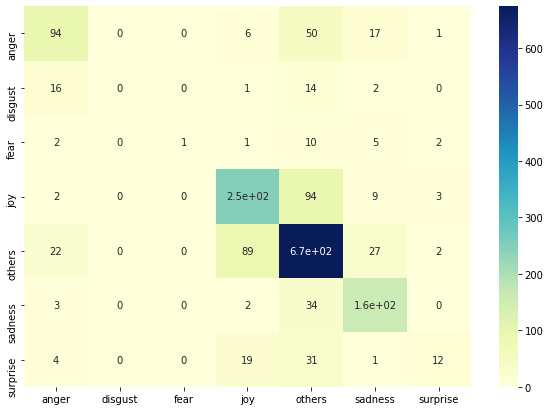


tfidf
              precision    recall  f1-score   support

       anger       0.64      0.25      0.36       168
     disgust       0.00      0.00      0.00        33
        fear       1.00      0.14      0.25        21
         joy       0.58      0.39      0.47       354
      others       0.68      0.74      0.71       814
     sadness       0.79      0.59      0.67       199
    surprise       0.08      0.34      0.12        67

    accuracy                           0.56      1656
   macro avg       0.54      0.35      0.37      1656
weighted avg       0.63      0.56      0.57      1656



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


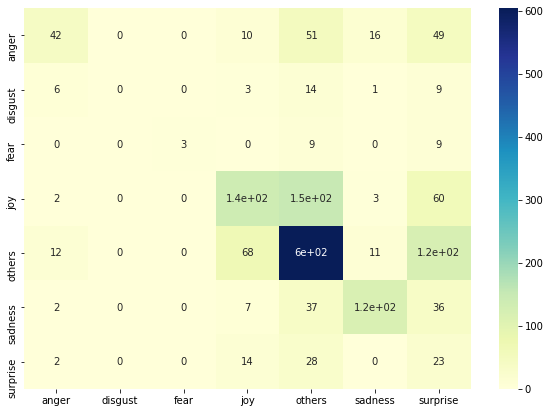


ngram
              precision    recall  f1-score   support

       anger       0.59      0.23      0.33       168
     disgust       0.00      0.00      0.00        33
        fear       1.00      0.24      0.38        21
         joy       0.59      0.37      0.46       354
      others       0.61      0.88      0.72       814
     sadness       0.82      0.56      0.66       199
    surprise       0.09      0.07      0.08        67

    accuracy                           0.61      1656
   macro avg       0.53      0.34      0.38      1656
weighted avg       0.60      0.61      0.57      1656



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


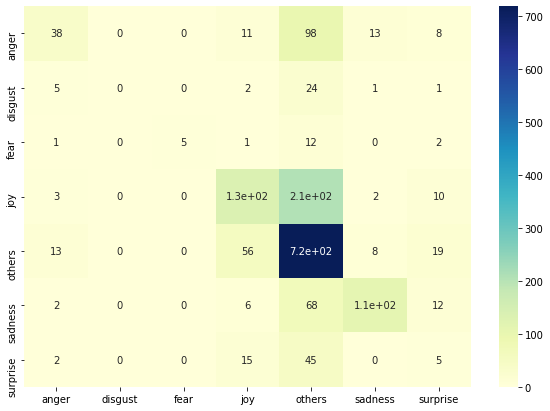


simon
              precision    recall  f1-score   support

       anger       0.63      0.45      0.52       168
     disgust       0.00      0.00      0.00        33
        fear       0.00      0.00      0.00        21
         joy       0.56      0.39      0.46       354
      others       0.63      0.86      0.73       814
     sadness       0.74      0.62      0.68       199
    surprise       0.00      0.00      0.00        67

    accuracy                           0.63      1656
   macro avg       0.37      0.33      0.34      1656
weighted avg       0.58      0.63      0.59      1656



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


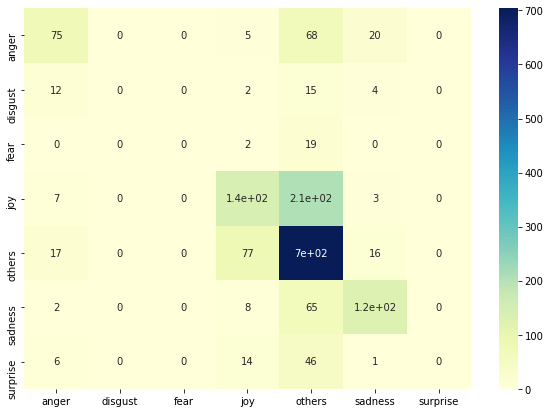


ngramfeats
              precision    recall  f1-score   support

       anger       0.61      0.39      0.47       168
     disgust       0.00      0.00      0.00        33
        fear       1.00      0.24      0.38        21
         joy       0.60      0.37      0.46       354
      others       0.63      0.88      0.74       814
     sadness       0.76      0.56      0.64       199
    surprise       0.09      0.06      0.07        67

    accuracy                           0.62      1656
   macro avg       0.53      0.36      0.40      1656
weighted avg       0.61      0.62      0.59      1656



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


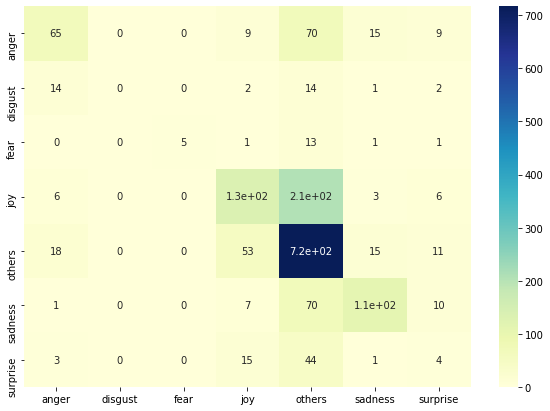


w2v
              precision    recall  f1-score   support

       anger       0.60      0.40      0.48       168
     disgust       0.00      0.00      0.00        33
        fear       0.50      0.05      0.09        21
         joy       0.53      0.33      0.41       354
      others       0.63      0.83      0.71       814
     sadness       0.73      0.63      0.68       199
    surprise       0.09      0.10      0.10        67

    accuracy                           0.60      1656
   macro avg       0.44      0.33      0.35      1656
weighted avg       0.58      0.60      0.57      1656



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


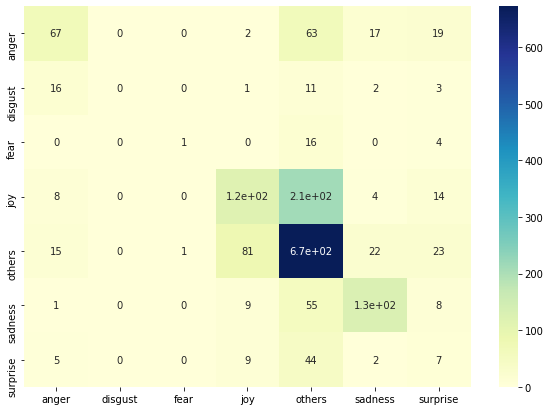

In [36]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

metrics = dict()
for name in preds.keys():
    labels = test_gold.set_index('id').loc[test['id']]['emotion']
    class_rep = classification_report(labels, preds[name])
    metrics[name] = {
        'acc': accuracy_score(labels, preds[name]),
        'f1': f1_score(labels, preds[name], average='weighted')
    }
    print(name)
    print(class_rep)
    c = confusion_matrix(labels, preds[name])
    plt.figure(figsize = (10,7))
    sn.heatmap(c, annot=True, cmap="YlGnBu", xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.show()
    print()

In [19]:
metrics = pd.DataFrame(metrics).T
metrics

,acc,f1
xlmroberta,0.727657,0.717028
binary-xlm,0.714372,0.689315
extrafeats,0.716787,0.696690
tfidf,0.560386,0.573360
ngram,0.609300,0.574472
simon,0.628623,0.589863
ngramfeats,0.624396,0.593031
w2v,0.597826,0.572548
